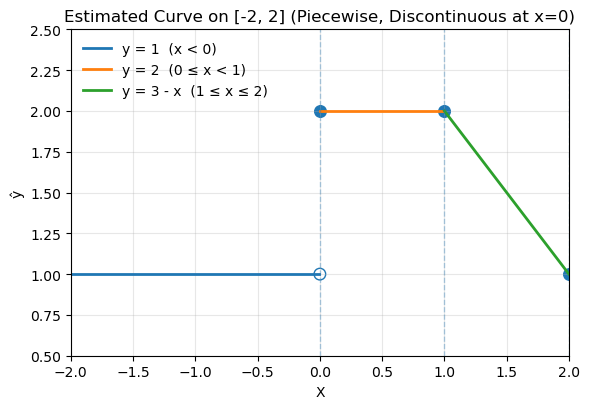

{'interval': '(-∞, 0)', 'slope': 0.0, 'intercept': 1.0, 'equation': 'y = 1'}
{'interval': '[0, 1)', 'slope': 0.0, 'intercept': 2.0, 'equation': 'y = 2'}
{'interval': '[1, 2]', 'slope': -1.0, 'intercept': 3.0, 'equation': 'y = 3 - x'}
y-intercept at x=0: 2.0
Any x-intercept on [-2,2]? -> None (ŷ never equals 0 on this interval)


In [ ]:
#Chapter7 question2
import numpy as np
import matplotlib.pyplot as plt

# ----- 1) Define the basis functions (for completeness) -----
def b1(x):
    x = np.asarray(x)
    return ( (0 <= x) & (x <= 2) ).astype(float) - (x - 1) * ( (1 <= x) & (x <= 2) ).astype(float)

def b2(x):
    x = np.asarray(x)
    return (x - 3) * ( (3 <= x) & (x <= 4) ).astype(float) + ( (4 < x) & (x <= 5) ).astype(float)

# Coefficients
b0, b1_hat, b2_hat = 1.0, 1.0, 3.0

# ----- 2) Piecewise definition of y-hat on [-2, 2] -----
# Segment A: (-∞, 0) -> here use [-2,0) in plot
xA = np.linspace(-2, 0, 200, endpoint=False)
yA = np.ones_like(xA)                      # y = 1

# Segment B: [0, 1) -> plot as [0,1)
xB = np.linspace(0, 1, 200, endpoint=False)
yB = 2 * np.ones_like(xB)                  # y = 2

# Segment C: [1, 2] -> plot as [1,2]
xC = np.linspace(1, 2, 200, endpoint=True)
yC = 3 - xC                                # y = 3 - x

# ----- 3) Plot each segment separately to avoid vertical connecting lines -----
plt.figure(figsize=(6.0, 4.2))

plt.plot(xA, yA, lw=2, label="y = 1  (x < 0)")
plt.plot(xB, yB, lw=2, label="y = 2  (0 ≤ x < 1)")
plt.plot(xC, yC, lw=2, label="y = 3 - x  (1 ≤ x ≤ 2)")

# Mark the discontinuity at x = 0:
# left-limit y(0-) = 1 (open circle), right-limit y(0) = 2 (closed circle)
plt.scatter(0, 1, facecolors='none', edgecolors='C0', s=70)  # open (not included from left segment)
plt.scatter(0, 2, color='C0', s=70)                          # closed (included in [0,1))

# Mark endpoints 1 and 2 (both included)
plt.scatter(1, 2, color='C0', s=70)
plt.scatter(2, 1, color='C0', s=70)

# Decorations
for xv in [0, 1, 2]:
    plt.axvline(xv, ls='--', lw=1, alpha=0.35)

plt.title("Estimated Curve on [-2, 2] (Piecewise, Discontinuous at x=0)")
plt.xlabel("X")
plt.ylabel("ŷ")
plt.xlim(-2, 2)
plt.ylim(0.5, 2.5)
plt.grid(alpha=0.3)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# ----- 4) Print slopes & intercepts for write-up -----
pieces = [
    {"interval": "(-∞, 0)", "slope": 0.0,  "intercept": 1.0, "equation": "y = 1"},
    {"interval": "[0, 1)",  "slope": 0.0,  "intercept": 2.0, "equation": "y = 2"},
    {"interval": "[1, 2]",  "slope": -1.0, "intercept": 3.0, "equation": "y = 3 - x"},
]
for p in pieces:
    print(p)

print("y-intercept at x=0:", 2.0)
print("Any x-intercept on [-2,2]? -> None (ŷ never equals 0 on this interval)")


### **Chapter7 Question 2 – Report the intercepts and slope values**

For the fitted model  
$$
\hat{Y} = 1 + b_1(X), \quad \text{where} \;
b_1(X) =
\begin{cases}
0, & X<0,\\[4pt]
1, & 0\le X<1,\\[4pt]
2-X, & 1\le X\le2,
\end{cases}
$$
the estimated curve on \([-2,2]\) consists of three linear pieces.

| Interval | Equation of segment | Slope | Intercept | Notes |
|-----------|--------------------|--------|------------|--------|
| \((-∞, 0)\) | \(y = 1\) | \(0\) | \(1\) | Flat line before \(x=0\) |
| \([0, 1)\) | \(y = 2\) | \(0\) | \(2\) | Horizontal line, discontinuous jump from 1 → 2 at \(x=0\) |
| \([1, 2]\) | \(y = 3 - x\) | \(-1\) | \(3\) | Downward sloping line segment ending at \(y=1\) |

**Intercepts**
- **y-intercept:** $\hat{Y}(0) = 2$.
- **x-intercept:** None on \([-2,2]\) (the fitted values are all positive).

**Summary:**  
The estimated curve is flat at \(y=1\) for \(x<0\), jumps to \(y=2\) at \(x=0\), remains constant between \(x=0\) and \(x=1\), and then decreases linearly with slope \(-1\) until \(x=2\).  
The function is therefore **piecewise linear** and **discontinuous at \(x=0\)**.


### **Chapter8 Question 2 – Why does boosting with depth-one trees lead to an additive model?**

Boosting adds one weak learner at a time in a forward stagewise manner:
$$
\hat f(x) = \sum_{b=1}^{B} \lambda\, \hat f^{(b)}(x) \quad \text{(Equation 8.12)}
$$

If each base learner is a **decision stump** (a tree with depth = 1), then each $\hat f^{(b)}(x)$
depends on only a single feature $X_{j_b}$:
$$
\hat f^{(b)}(x) = g_{j_b}\!\left(x_{j_b}\right).
$$

Summing over all boosting iterations gives
$$
\hat f(x) = \sum_{b=1}^{B} \lambda\, g_{j_b}\!\left(x_{j_b}\right)
          = \sum_{j=1}^{p} f_j(x_j),
$$
which is an **additive model** over features.

Hence, boosting with depth-one trees produces an additive model because each boosting step
contributes a univariate function, and all steps are added together to form the final predictor.


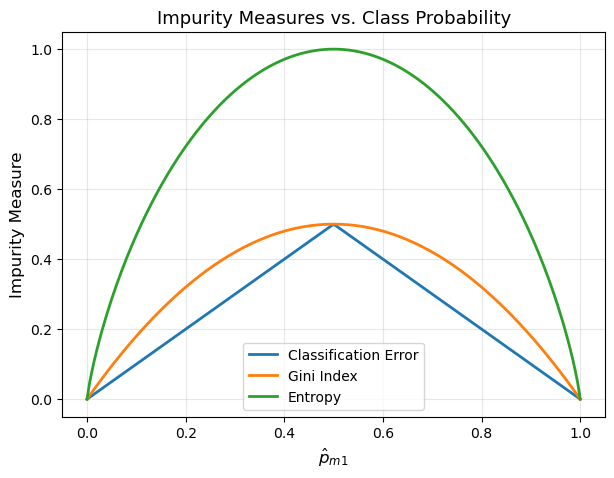

In [ ]:
#Chapter8 question3
import numpy as np
import matplotlib.pyplot as plt

# Probability of class 1
p = np.linspace(0, 1, 200)
p = np.clip(p, 1e-10, 1-1e-10)  # avoid log(0)

# 1. Classification error
error = 1 - np.maximum(p, 1 - p)

# 2. Gini index
gini = 2 * p * (1 - p)

# 3. Entropy (base 2)
entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Plot
plt.figure(figsize=(7,5))
plt.plot(p, error, label="Classification Error", lw=2)
plt.plot(p, gini, label="Gini Index", lw=2)
plt.plot(p, entropy, label="Entropy", lw=2)

plt.xlabel(r"$\hat{p}_{m1}$", fontsize=12)
plt.ylabel("Impurity Measure", fontsize=12)
plt.title("Impurity Measures vs. Class Probability", fontsize=13)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


The plot shows that all three impurity measures reach 0 when the node is pure 
($\hat{p}_{m1}=0$ or $1$) and attain their maximum at $\hat{p}_{m1}=0.5$.
Entropy (green) grows fastest near the midpoint, indicating higher sensitivity to class uncertainty,
while the Gini index (orange) is smoother. Classification error (blue) changes linearly and 
is less sensitive, making it less useful for decision tree splitting.
